# VGG-16(2014)의 구조
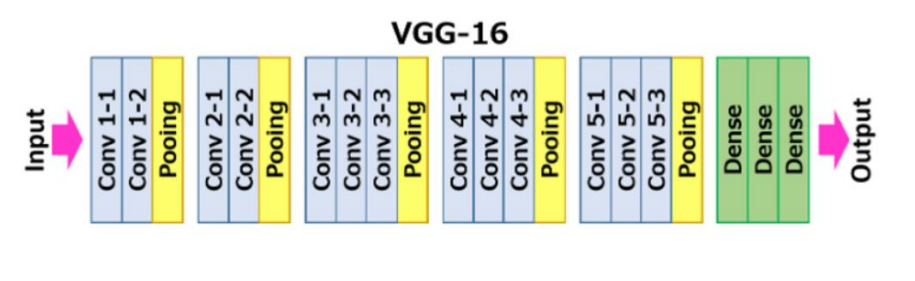


* 네트워크 깊이가 모델 성능에 영향을 준다.
* 커널 크기를 `3 x 3` 고정.

# AlexNet vs VGG

### AlexNet의 고민
* AlexNet은 Convolution 레이어를 쌓다 보니까 깊으면 성능이 좋아진다 라는 것을 발견
* 이미지 별로 Conv 연산을 위한 커널의 크기와 개수, padding, strides 값을 어떻게 정해야 할지 고민

### VGG의 장점
* 단일화된 커널 크기, padding, strides 값으로 단순한 네트워크를 구성
  - AlexNet 보다 더 나은 성능을 자랑
* AlexNet의 11x11, 5x5 같은 큰 Receptive Field를 가진 커널 크기를 적용하지 않고 3x3 커널을 연속으로 적용
* AlexNet보다 깊은 네트워크를 구성하나, 더 적은 파라미터 개수로 연산 성능을 개선

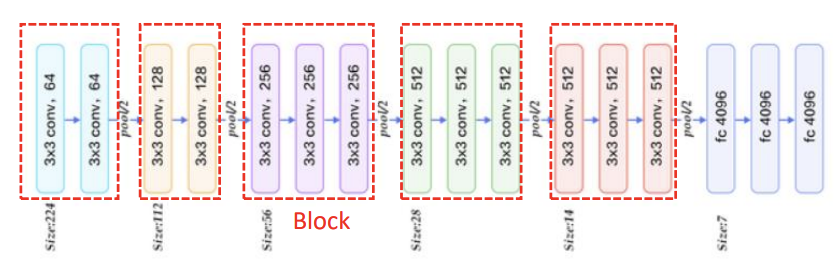

# VGG-16 상세 구조
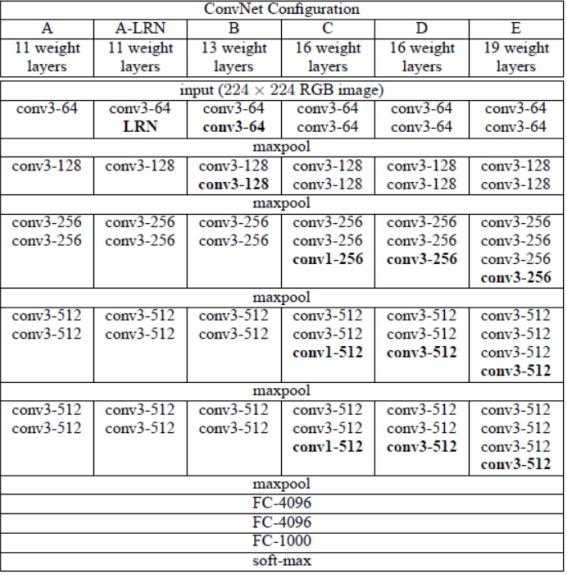


In [1]:
# Feature Extraction을 위한 레이어
from tensorflow.keras.layers import Conv2D, Activation, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization

# Fully Connected Layer를 위한 레이어
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, GlobalAveragePooling2D

input = Input(shape=(224, 224, 3))

# Feature Extraction
# Block 1 - ( 3, 3, 64 ) x 2
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(input)
x = Conv2D(filters=64, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Block 2 - ( 3, 3, 128 ) x 2
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=128, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Block 3 - ( 3, 3, 256 ) x 3
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=256, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Block 4 - ( 3, 3, 512 ) x 3
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Block 5 - ( 3, 3, 512 ) x 3
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = Conv2D(filters=512, kernel_size=(3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D(pool_size=(2, 2), strides=(2, 2))(x)

# Fully Connected Layer
x = GlobalAveragePooling2D()(x)

x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(4096, activation='relu')(x)
x = Dropout(0.5)(x)
output = Dense(10, activation='softmax')(x)